# Setup

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Connect Drive

In [ ]:
# johndoe.trial6 account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
#general
import string
import re
import warnings
warnings.filterwarnings("ignore")

#data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

#data cleaning


#nltk

#fastai
from fastai.text import *
from fastai.vision import *
from fastai.metrics import error_rate

## Env vars

In [ ]:
bs = 16

In [ ]:
path = '/content/drive/MyDrive/EEG_dataset/combined_datasets'
path_img = '/content/drive/MyDrive/EEG_dataset/fpz_images'
path_img_trial = '/content/drive/MyDrive/EEG_dataset/fpz_images_trial'
path_img_balanced = '/content/drive/MyDrive/EEG_dataset/fpz_images_balanced'

# Dataset

In [ ]:
df_raw = pd.read_csv(f'{path}/fpz_12345.csv')

In [ ]:
df_raw.head()

,EEG_Fpz_Cz,sleep_stage
0,"[5.016849816849817, -2.578754578754579, 1.3597...",0
1,"[11.2996336996337, 18.145054945054945, 18.8014...",0
2,"[13.362637362637363, 10.736996336996336, 6.329...",0
3,"[-1.9223443223443224, -1.0783882783882783, -2....",0
4,"[12.987545787545788, 16.175824175824175, 14.86...",0


In [ ]:
df_raw.shape

(13934, 2)

In [ ]:
df_raw['sleep_stage'].value_counts()

0    9470
2    2390
4     849
3     813
1     412
Name: sleep_stage, dtype: int64

# Making graphs from fpz data

In [ ]:
df_raw['EEG_Fpz_Cz'] = df_raw['EEG_Fpz_Cz'].map(eval)

KeyboardInterrupt: ignored

In [ ]:
y = []
for i in range(30000):
  if  i % 10 == 0:
    y.append(i+10)

print(y)

## Dataset with 50 values of each class

In [ ]:
df0 = df_raw[df_raw['sleep_stage'] == 0].sample(n=50)
df1 = df_raw[df_raw['sleep_stage'] == 1].sample(n=50)
df2 = df_raw[df_raw['sleep_stage'] == 2].sample(n=50)
df3 = df_raw[df_raw['sleep_stage'] == 3].sample(n=50)
df4 = df_raw[df_raw['sleep_stage'] == 4].sample(n=50)

In [ ]:
frames = [df0, df1, df2, df3, df4]

In [ ]:
result = pd.concat(frames)

In [ ]:
result.head()

,EEG_Fpz_Cz,sleep_stage
4921,"[-28.57289377289378, -14.010989010989022, -17....",0
3145,"[-18.89890109890111, -30.202197802197812, -33....",0
10809,"[-21.457142857142866, -14.479120879120888, -3....",0
452,"[53.966300366300366, 49.55897435897436, 51.246...",0
11408,"[-40.84615384615385, -33.64615384615385, -40.9...",0


In [ ]:
result = result.reset_index(drop=True)

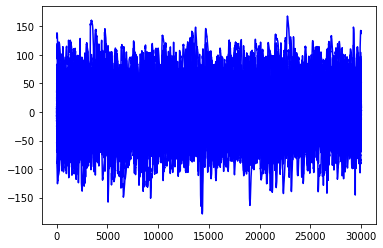

In [ ]:
for i in range(len(result)):
  attribute = result['sleep_stage'].iloc[i]
  data = result['EEG_Fpz_Cz'].iloc[i]
  plt.plot(y,data,'b')
  plt.savefig(f'{path_img_trial}/{attribute}_{i}.jpg')

## Dataset with 200 values of each class

In [ ]:
df0 = df_raw[df_raw['sleep_stage'] == 0].sample(n=200)
df1 = df_raw[df_raw['sleep_stage'] == 1].sample(n=200)
df2 = df_raw[df_raw['sleep_stage'] == 2].sample(n=200)
df3 = df_raw[df_raw['sleep_stage'] == 3].sample(n=200)
df4 = df_raw[df_raw['sleep_stage'] == 4].sample(n=200)

In [ ]:
frames = [df0, df1, df2, df3, df4]

In [ ]:
result = pd.concat(frames)

In [ ]:
result.head()

,EEG_Fpz_Cz,sleep_stage
13395,"[-7.615384615384616, -4.2, -5.584615384615385,...",0
5883,"[-3.1384615384615615, -3.3377289377289605, -6....",0
7307,"[39.405128205128186, 34.2241758241758, 29.3421...",0
144,"[33.14871794871795, 32.02344322344322, 33.8989...",0
3308,"[-4.43882783882785, -5.660805860805872, 3.9113...",0


In [ ]:
result = result.reset_index(drop=True)

In [ ]:
result.shape

(1000, 2)

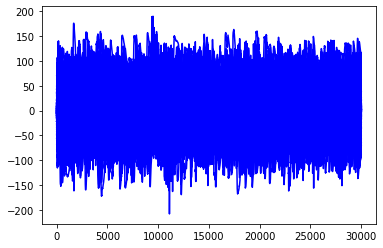

In [ ]:
for i in range(len(result)):
  attribute = result['sleep_stage'].iloc[i]
  data = result['EEG_Fpz_Cz'].iloc[i]
  plt.plot(y,data,'b')
  plt.savefig(f'{path_img_balanced}/{attribute}_{i}.jpg')

## Dataset with randomly samples values

In [ ]:
df = df_raw.sample(n=2000)

In [ ]:
df = df.reset_index(drop=True)

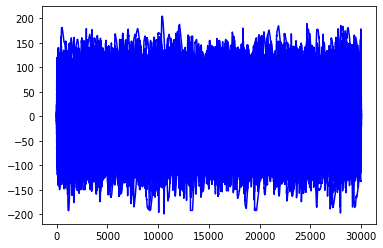

In [ ]:
for i in range(len(df)):
  attribute = df['sleep_stage'].iloc[i]
  data = df['EEG_Fpz_Cz'].iloc[i]
  plt.plot(y,data,'b')
  plt.savefig(f'{path_img}/{attribute}_{i}.jpg')

#  Training ResNet-34 (2000 random img)


## Databunch creation

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1001.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/2_1002.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1003.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/4_1004.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1005.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=16
                                  ).normalize(imagenet_stats)

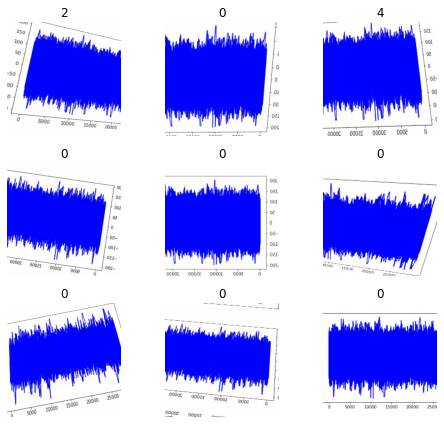

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c

['0', '1', '2', '3', '4']


(5, 5)

## Model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


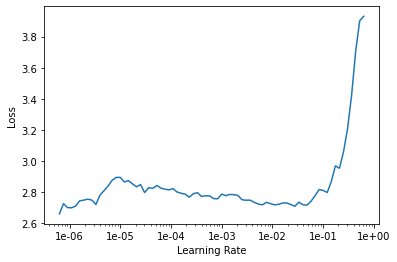

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,2.199753,1.597129,0.492500,09:22
1,1.601733,1.900328,0.752500,09:18
2,1.447604,1.351060,0.330000,09:17


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,2,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,2,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


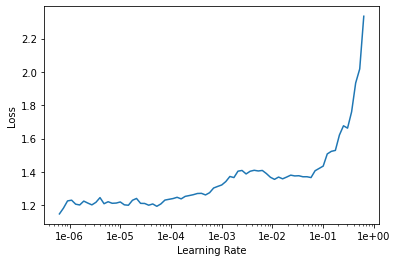

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.245631,1.170713,0.310000,13:31
1,1.195378,1.318077,0.310000,13:29
2,1.185298,1.132585,0.310000,13:31
3,1.141886,1.223634,0.310000,13:32


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,2,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,2,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

## Interpreting results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

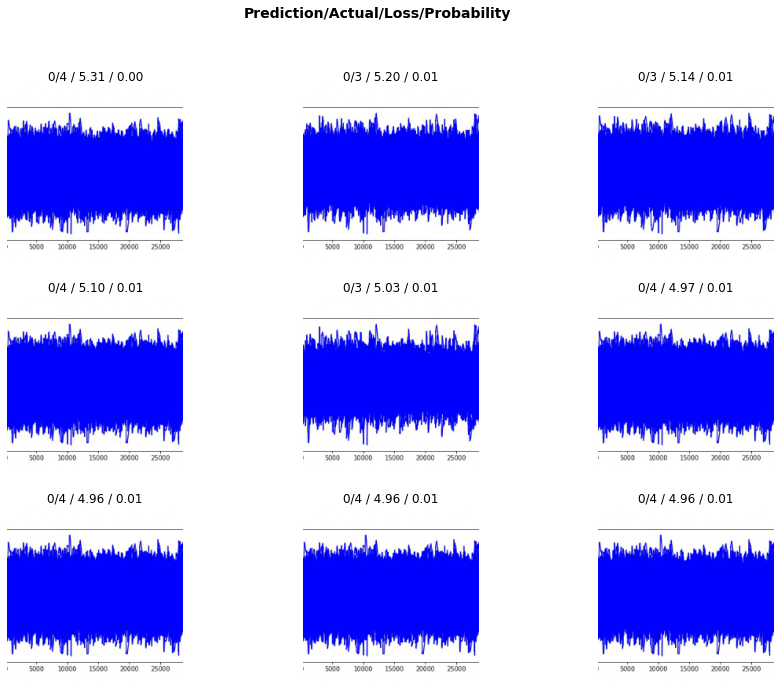

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

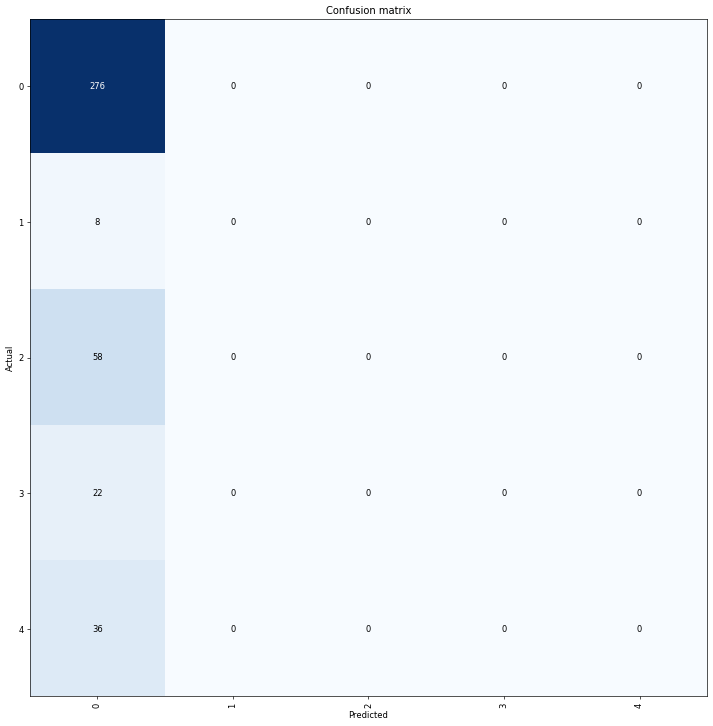

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('2', '0', 58), ('4', '0', 36), ('3', '0', 22), ('1', '0', 8)]

#  Training ResNet-50 (2000 random img)

## Databunch creation

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1001.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/2_1002.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1003.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/4_1004.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images/0_1005.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=None, size=224, bs=bs
                                  ).normalize(imagenet_stats)

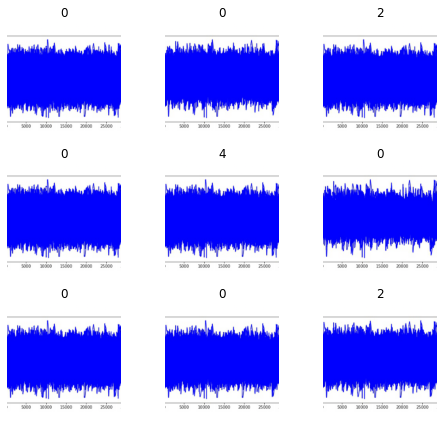

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c

['0', '1', '2', '3', '4']


(5, 5)

## Model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


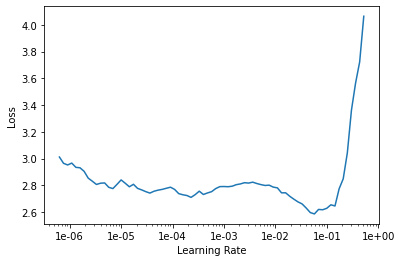

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.108945,1.615221,0.562500,12:00
1,1.442392,1.227061,0.332500,11:57
2,1.299154,1.179736,0.310000,12:03
3,1.102618,1.095640,0.310000,11:54


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,2,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,2,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


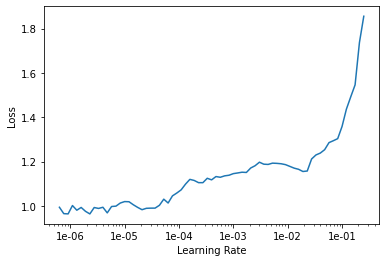

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.109648,1.098299,0.310000,15:51
1,1.123851,1.076078,0.310000,15:58


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,2,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,2,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

## Interpreting results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

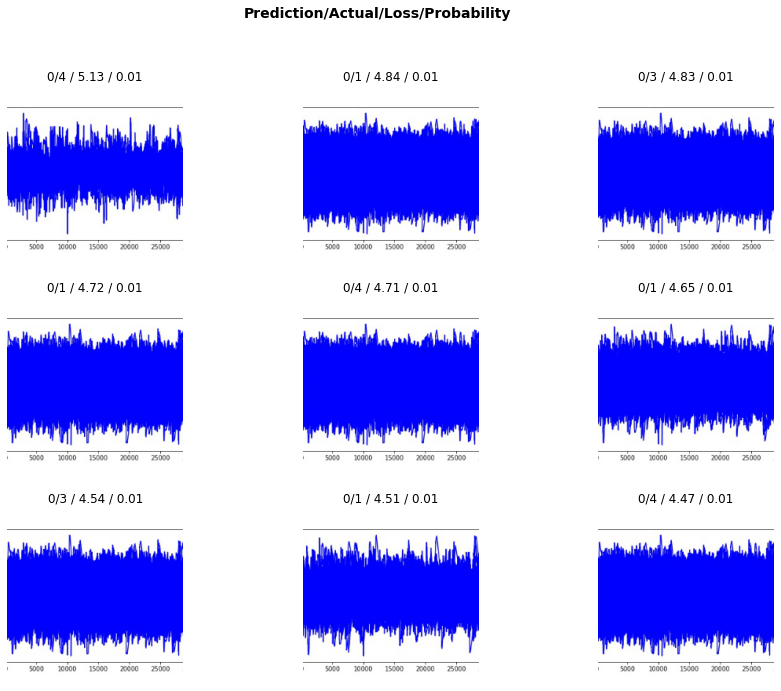

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

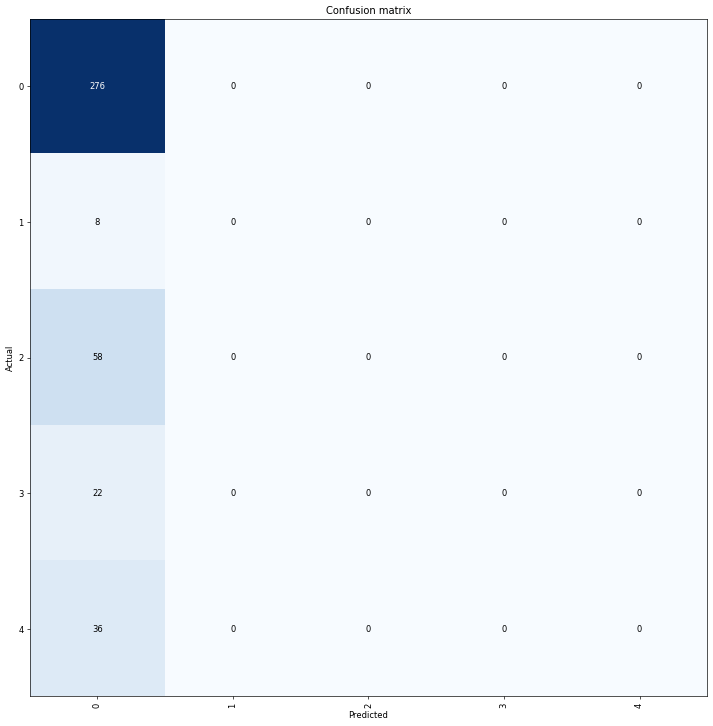

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('2', '0', 58), ('4', '0', 36), ('3', '0', 22), ('1', '0', 8)]

#  Training ResNet-50 (200 balanced images)

## Databunch creation

In [ ]:
fnames = get_image_files(path_img_trial)
fnames[:5]

[PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_trial/0_22.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_trial/0_23.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_trial/0_24.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_trial/0_25.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_trial/0_26.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=None, size=224, bs=bs
                                  ).normalize(imagenet_stats)

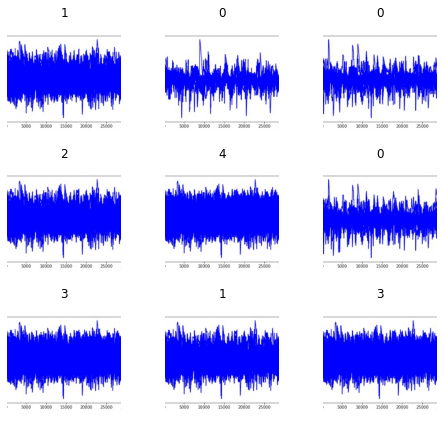

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c

['0', '1', '2', '3', '4']


(5, 5)

## Model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


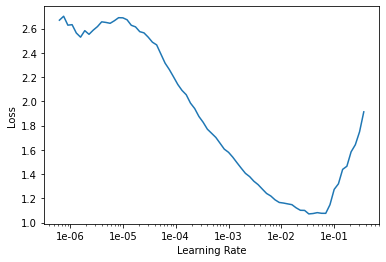

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.038594,11.203418,0.780000,01:24
1,0.780795,5.253231,0.780000,01:26
2,0.561376,0.557773,0.360000,01:26
3,0.464386,0.069693,0.040000,01:25


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (50 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,4,2
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


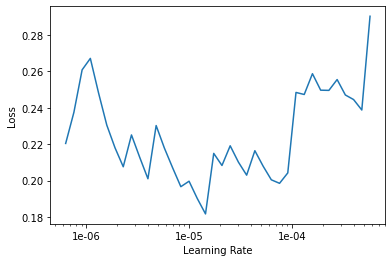

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, slice(8e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.202689,0.039900,0.020000,01:57
1,0.237036,0.030716,0.020000,01:58
2,0.268165,0.027837,0.020000,01:55
3,0.243160,0.023189,0.020000,01:53


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (50 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,4,2
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

## Interpreting results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

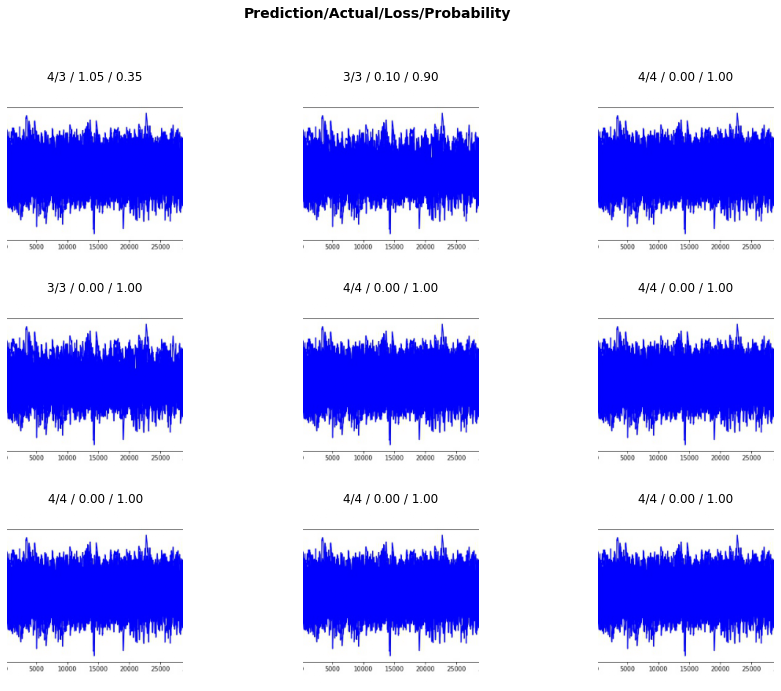

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

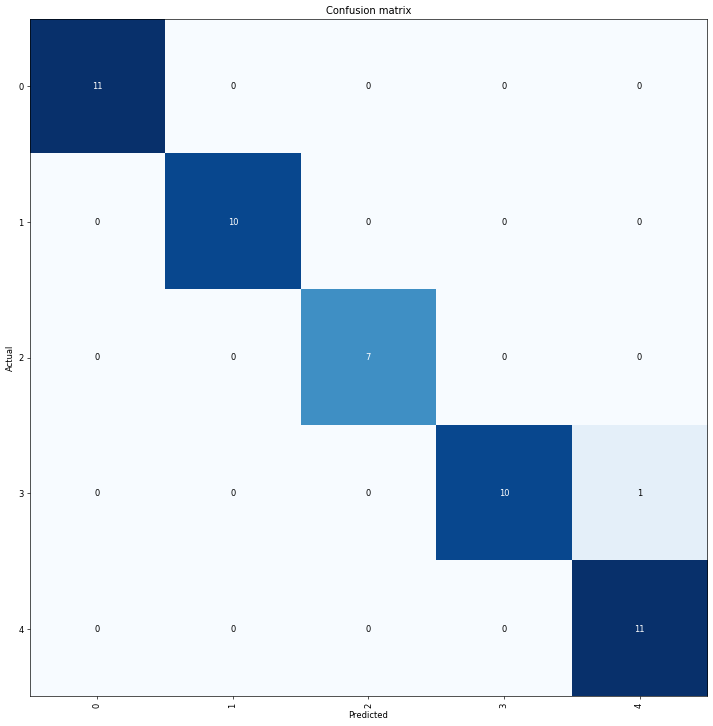

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[]

#  Training ResNet-50 (1000 balanced images)

## Databunch creation

In [ ]:
fnames = get_image_files(path_img_balanced)
fnames[:5]

[PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_balanced/0_0.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_balanced/0_1.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_balanced/0_2.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_balanced/0_3.jpg'),
 PosixPath('/content/drive/MyDrive/EEG_dataset/fpz_images_balanced/0_4.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=None, size=224, bs=bs
                                  ).normalize(imagenet_stats)

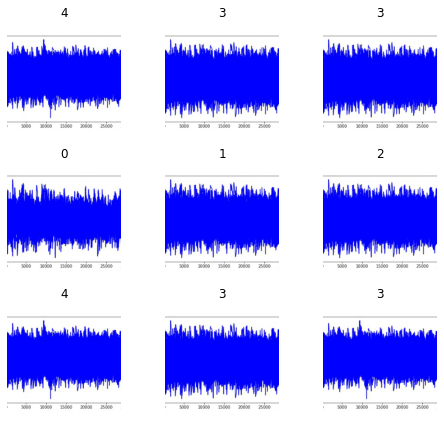

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c

['0', '1', '2', '3', '4']


(5, 5)

## Model

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate, Recall(), Precision()])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [ ]:
learn.fit_one_cycle(4, 3e-4)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, slice(1e-6))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,3,4,1,4
Path: /content/drive/MyDrive/EEG_dataset/fpz_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

## Interpreting results

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)

In [ ]:
from sklearn.metrics import roc_auc_score, auc, plot_roc_curve
roc_auc_score(y, preds ,average="weighted", multi_class="ovo")

plot_roc_curve(clf, X_test, y_test)  

0.9984636566008518

In [ ]:
print(classification_report(y, np.argmax(preds, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.91      1.00      0.95        41
           2       1.00      0.93      0.96        42
           3       1.00      0.89      0.94        36
           4       0.92      1.00      0.96        45

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [ ]:
interp

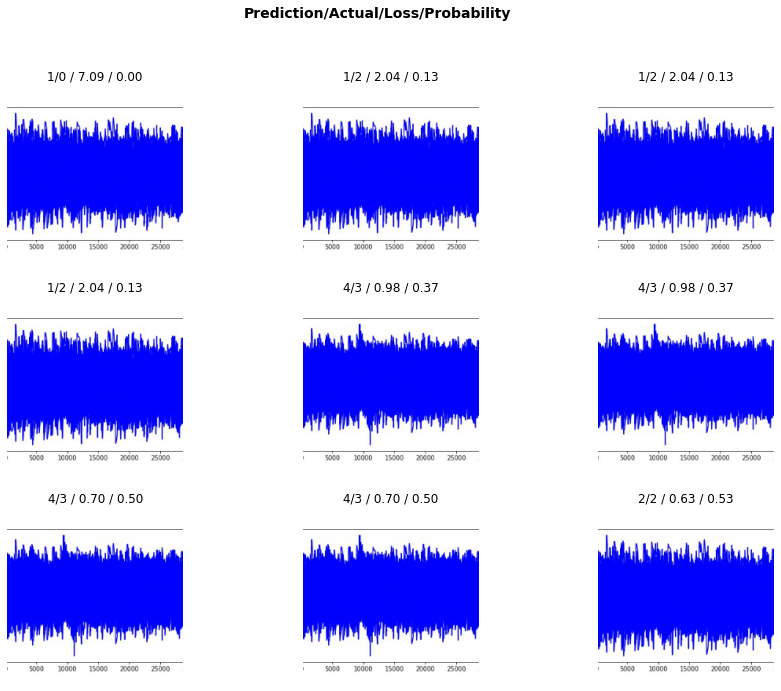

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

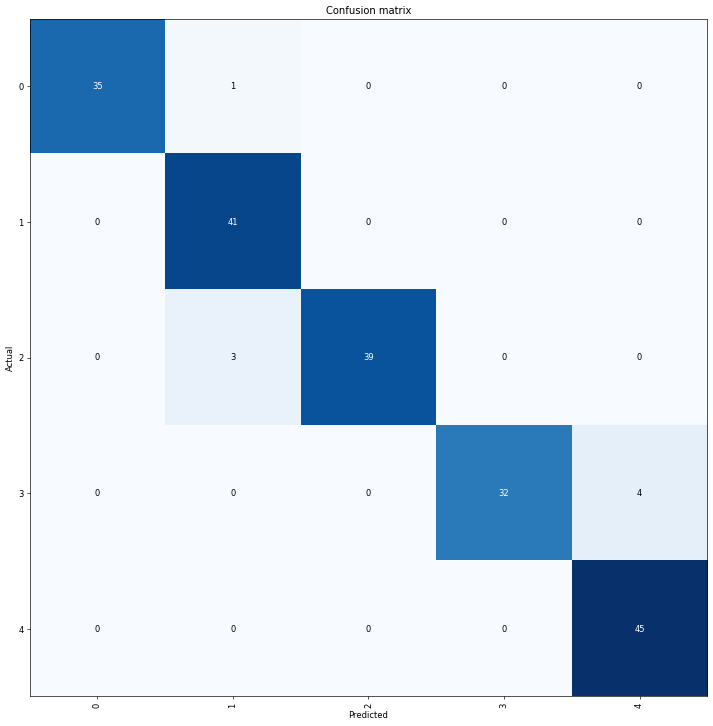

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('3', '4', 4), ('2', '1', 3)]